In [1]:
import os
import netCDF4 as nc
import numpy as np
import pandas as pd

import pickle

import copy

import scipy.io as io

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors, colorbar
%matplotlib inline

from skimage import measure
from skimage.filters import gaussian

from impdar import *

from autopicker_methods import *

In [2]:
#files on disk
green_image = '../images/nline5.png'
green_mat = '../data/nline5_migtk_cropped.mat'

#load in data
dat = io.loadmat(green_mat)
data = dat['data']

#original image
mini = -8.774235248565674
maxi = 9.667154026031533

In [3]:
#load in contour data
with open('long_contours_subset', 'rb') as file:
    long_contours_subset = pickle.load(file)
    
with open('uniquex_list', 'rb') as file:
    uniquex_list = pickle.load(file)
    
with open('ridge_points_list', 'rb') as file:
    ridge_points_list = pickle.load(file)
    
with open('top_list', 'rb') as file:
    top_list = pickle.load(file)
    
with open('bottom_list', 'rb') as file:
    bottom_list = pickle.load(file)

In [4]:
#should be 78
print(len(long_contours_subset))
print(len(uniquex_list))
print(len(ridge_points_list))
print(len(top_list))
print(len(bottom_list))

78
78
78
78
78


In [ ]:
# fig, ax = plt.subplots(figsize=(15, 10))

# #plot grid
# p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

# for i, contour in enumerate(long_contours_subset):
#     #plot ridge points
#     ridge = ridge_points_list[i]
#     uniqx = uniquex_list[i]
    
#     c = cm.RdYlBu_r(i/len(long_contours_subset))
        
#     for j, x in enumerate(uniqx):
#         r = ridge[j]
#         ax.scatter(x, r, color=c, marker='o', s=10)
        
# ax.set_ylim(3000, 500)

# fig.colorbar(cm.ScalarMappable(cmap=cm.RdYlBu_r), ax=ax)
    
# plt.show()

#this takes forever, maybe make it a .py script

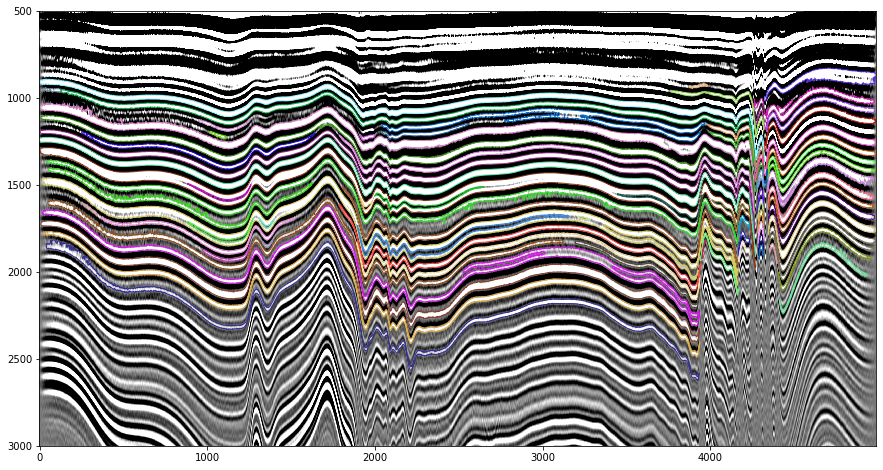

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
p = ax.imshow(data, cmap='gray', aspect='auto', vmin=mini, vmax=maxi, interpolation='nearest')

for i, contour in enumerate(long_contours_subset):
    plt.plot(contour[:, 1], contour[:, 0], color=np.random.rand(3,), linewidth=1)
    
ax.set_ylim(3000, 500)

plt.show()

In [6]:
shape = np.shape(data[500:3000, :])
print(shape)

(2500, 4991)


### Try to sort these contours here

Since we have the ridges, we should be able to sort them by their starting index. So for each ridge:
- we need to sort by x and y index (bubble sort?)
- https://www.geeksforgeeks.org/bubble-sort/
- https://en.wikipedia.org/wiki/Bubble_sort


- compare starting x points. is it before the previous contour?
- if no, skip
- if yes, is its y point higher? this is in an attempt to push contours closer to the upper left corner first, while pushing those towards the lower right down in the list

In [5]:
#save the first x, y element of x's and y's
uniquex0 = []
ridges0 = []

In [6]:
#first things first: need to print the first x and y coordinates of each of the ridge_points_list items
# there should be 78 total
for i, item in enumerate(ridge_points_list):
    uniquex = uniquex_list[i]
    
    uniquex0.append(uniquex[0])
    ridges0.append(item[0])
    #print(i, item[0], uniquex[0])

#now create tuples of the points so that we can compare the x, y points during sorting
tuples = list(zip(uniquex0, ridges0))

In [7]:
tuples[:5]

[(4325, 999), (4, 907), (3875, 936), (4258, 1039), (23, 950)]

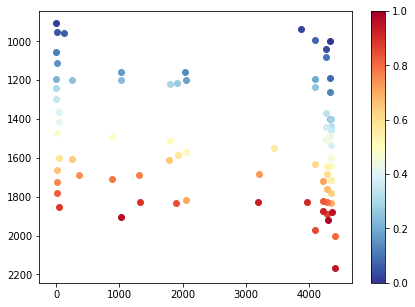

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

for i in range(len(uniquex0)):
    c = cm.RdYlBu_r(i/len(uniquex0))
    ax.scatter(uniquex0[i], ridges0[i], color=c)

plt.gca().invert_yaxis()
fig.colorbar(cm.ScalarMappable(cmap=cm.RdYlBu_r), ax=ax)

plt.show()

In [63]:
#try and define bubble sort here
#will need to keep track of original index so that we can also change the positions of top_list and bottom_list list items
"""
Pass in the list containing all of the ridges that you found from the find_ridge() method.
This method is going to sort that list by x and y coordinates, performing a kind of nested bubble sort.
The goal of this method is to arrange contours such that:
- contours with first (x, y) pairs closest to the upper left corner of the radargram will come first
- contours with first (x, y) pairs closest to the lower right will come last.

Returns a list of ridge lines sorted by first (x, y) pair.
"""
def bubble_sort(xy_points):
    
    #make a copy of our xy_points list
    xy_copy = [xy for xy in xy_points]
    
    #adapted from https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-4.php
    for element in range(len(xy_copy) - 1, 0, -1): 
        for i in range(element):
        
            print(element, i, xy_copy)
            #move things with higher x values to the end of the list
            if xy_copy[i][0] > xy_copy[i+1][0]:
                temp = xy_copy[i]
                xy_copy[i] = xy_copy[i+1]
                xy_copy[i+1] = temp
    
    
    #now shift contours with the same y value to the left
    
    return xy_copy

## NEED TO adapt this to also sort y values

In [64]:
second_list = bubble_sort(tuples[0:9])

8 0 [(4325, 999), (4, 907), (3875, 936), (4258, 1039), (23, 950), (131, 958), (4096, 995), (4335, 1190), (4267, 1078)]
8 1 [(4, 907), (4325, 999), (3875, 936), (4258, 1039), (23, 950), (131, 958), (4096, 995), (4335, 1190), (4267, 1078)]
8 2 [(4, 907), (3875, 936), (4325, 999), (4258, 1039), (23, 950), (131, 958), (4096, 995), (4335, 1190), (4267, 1078)]
8 3 [(4, 907), (3875, 936), (4258, 1039), (4325, 999), (23, 950), (131, 958), (4096, 995), (4335, 1190), (4267, 1078)]
8 4 [(4, 907), (3875, 936), (4258, 1039), (23, 950), (4325, 999), (131, 958), (4096, 995), (4335, 1190), (4267, 1078)]
8 5 [(4, 907), (3875, 936), (4258, 1039), (23, 950), (131, 958), (4325, 999), (4096, 995), (4335, 1190), (4267, 1078)]
8 6 [(4, 907), (3875, 936), (4258, 1039), (23, 950), (131, 958), (4096, 995), (4325, 999), (4335, 1190), (4267, 1078)]
8 7 [(4, 907), (3875, 936), (4258, 1039), (23, 950), (131, 958), (4096, 995), (4325, 999), (4335, 1190), (4267, 1078)]
7 0 [(4, 907), (3875, 936), (4258, 1039), (23, 9

In [65]:
third = bubble_sort(tuples)

77 0 [(4325, 999), (4, 907), (3875, 936), (4258, 1039), (23, 950), (131, 958), (4096, 995), (4335, 1190), (4267, 1078), (7, 1055), (4324, 1259), (2041, 1156), (8, 1113), (1024, 1155), (2048, 1197), (4096, 1194), (4324, 1399), (4, 1194), (1024, 1198), (253, 1198), (4096, 1236), (1912, 1214), (4340, 1399), (1794, 1220), (0, 1239), (4341, 1438), (4266, 1367), (3, 1296), (4344, 1454), (4267, 1439), (4342, 1531), (43, 1364), (4269, 1510), (54, 1414), (4325, 1485), (4281, 1515), (4345, 1602), (17, 1471), (4347, 1640), (882, 1492), (1806, 1511), (2048, 1572), (4282, 1640), (4346, 1716), (3445, 1551), (1920, 1584), (50, 1601), (4284, 1682), (4096, 1631), (4346, 1783), (253, 1605), (1789, 1613), (15, 1663), (4284, 1761), (4348, 1833), (2048, 1817), (4224, 1719), (3212, 1682), (371, 1689), (8, 1725), (1310, 1689), (882, 1710), (4285, 1826), (4405, 2003), (22, 1779), (4224, 1820), (1890, 1830), (4096, 1973), (4287, 1891), (42, 1854), (1330, 1826), (3968, 1829), (4224, 1875), (3194, 1828), (4413, 

66 4 [(4, 907), (7, 1055), (8, 1113), (23, 950), (131, 958), (1024, 1155), (4, 1194), (1024, 1198), (253, 1198), (2041, 1156), (1912, 1214), (2048, 1197), (1794, 1220), (0, 1239), (3875, 936), (4096, 995), (3, 1296), (4096, 1194), (4096, 1236), (4258, 1039), (43, 1364), (4266, 1367), (54, 1414), (4267, 1078), (4267, 1439), (4269, 1510), (17, 1471), (4281, 1515), (882, 1492), (1806, 1511), (2048, 1572), (4282, 1640), (4324, 1259), (3445, 1551), (1920, 1584), (50, 1601), (4284, 1682), (4096, 1631), (4324, 1399), (253, 1605), (1789, 1613), (15, 1663), (4284, 1761), (4325, 999), (2048, 1817), (4224, 1719), (3212, 1682), (371, 1689), (8, 1725), (1310, 1689), (882, 1710), (4285, 1826), (4325, 1485), (22, 1779), (4224, 1820), (1890, 1830), (4096, 1973), (4287, 1891), (42, 1854), (1330, 1826), (3968, 1829), (4224, 1875), (3194, 1828), (4335, 1190), (4340, 1399), (1024, 1903), (4290, 1921), (4341, 1438), (4342, 1531), (4344, 1454), (4345, 1602), (4346, 1716), (4346, 1783), (4347, 1640), (4348, 

56 19 [(4, 907), (4, 1194), (0, 1239), (7, 1055), (8, 1113), (3, 1296), (23, 950), (131, 958), (253, 1198), (43, 1364), (1024, 1155), (54, 1414), (1024, 1198), (1794, 1220), (1912, 1214), (17, 1471), (2041, 1156), (882, 1492), (1806, 1511), (2048, 1197), (2048, 1572), (3875, 936), (4096, 995), (3445, 1551), (1920, 1584), (50, 1601), (4096, 1194), (4096, 1236), (4096, 1631), (253, 1605), (1789, 1613), (15, 1663), (4258, 1039), (4266, 1367), (2048, 1817), (4224, 1719), (3212, 1682), (371, 1689), (8, 1725), (1310, 1689), (882, 1710), (4267, 1078), (4267, 1439), (22, 1779), (4224, 1820), (1890, 1830), (4096, 1973), (4269, 1510), (42, 1854), (1330, 1826), (3968, 1829), (4224, 1875), (3194, 1828), (4281, 1515), (4282, 1640), (1024, 1903), (4284, 1682), (4284, 1761), (4285, 1826), (4287, 1891), (4290, 1921), (4324, 1259), (4324, 1399), (4325, 999), (4325, 1485), (4335, 1190), (4340, 1399), (4341, 1438), (4342, 1531), (4344, 1454), (4345, 1602), (4346, 1716), (4346, 1783), (4347, 1640), (4348,

43 19 [(0, 1239), (3, 1296), (4, 907), (4, 1194), (7, 1055), (8, 1113), (17, 1471), (23, 950), (43, 1364), (54, 1414), (131, 958), (50, 1601), (253, 1198), (882, 1492), (1024, 1155), (253, 1605), (1024, 1198), (15, 1663), (1789, 1613), (1794, 1220), (1806, 1511), (1912, 1214), (1920, 1584), (2041, 1156), (371, 1689), (8, 1725), (1310, 1689), (882, 1710), (2048, 1197), (2048, 1572), (22, 1779), (2048, 1817), (1890, 1830), (3212, 1682), (3445, 1551), (42, 1854), (1330, 1826), (3875, 936), (3968, 1829), (3194, 1828), (4096, 995), (4096, 1194), (1024, 1903), (4096, 1236), (4096, 1631), (4096, 1973), (4224, 1719), (4224, 1820), (4224, 1875), (4258, 1039), (4266, 1367), (4267, 1078), (4267, 1439), (4269, 1510), (4281, 1515), (4282, 1640), (4284, 1682), (4284, 1761), (4285, 1826), (4287, 1891), (4290, 1921), (4324, 1259), (4324, 1399), (4325, 999), (4325, 1485), (4335, 1190), (4340, 1399), (4341, 1438), (4342, 1531), (4344, 1454), (4345, 1602), (4346, 1716), (4346, 1783), (4347, 1640), (4348,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



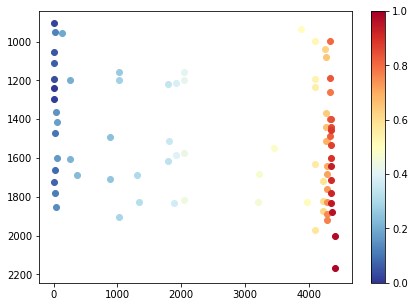

In [68]:
fig, ax = plt.subplots(figsize=(7, 5))

for i in range(len(third)):
    c = cm.RdYlBu_r(i/len(third))
    ax.scatter(third[i][0], third[i][1], color=c)

plt.gca().invert_yaxis()
fig.colorbar(cm.ScalarMappable(cmap=cm.RdYlBu_r), ax=ax)

plt.show()